# Proyecto UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

## 1. Importación del dataset

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
import pandas as pd
data = pd.read_csv('data/paises.csv')
data

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [30]:
data.describe()

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [31]:
data.isnull().sum()

pais             0
mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

## 2. EDA&Preprocessing (2 puntos)

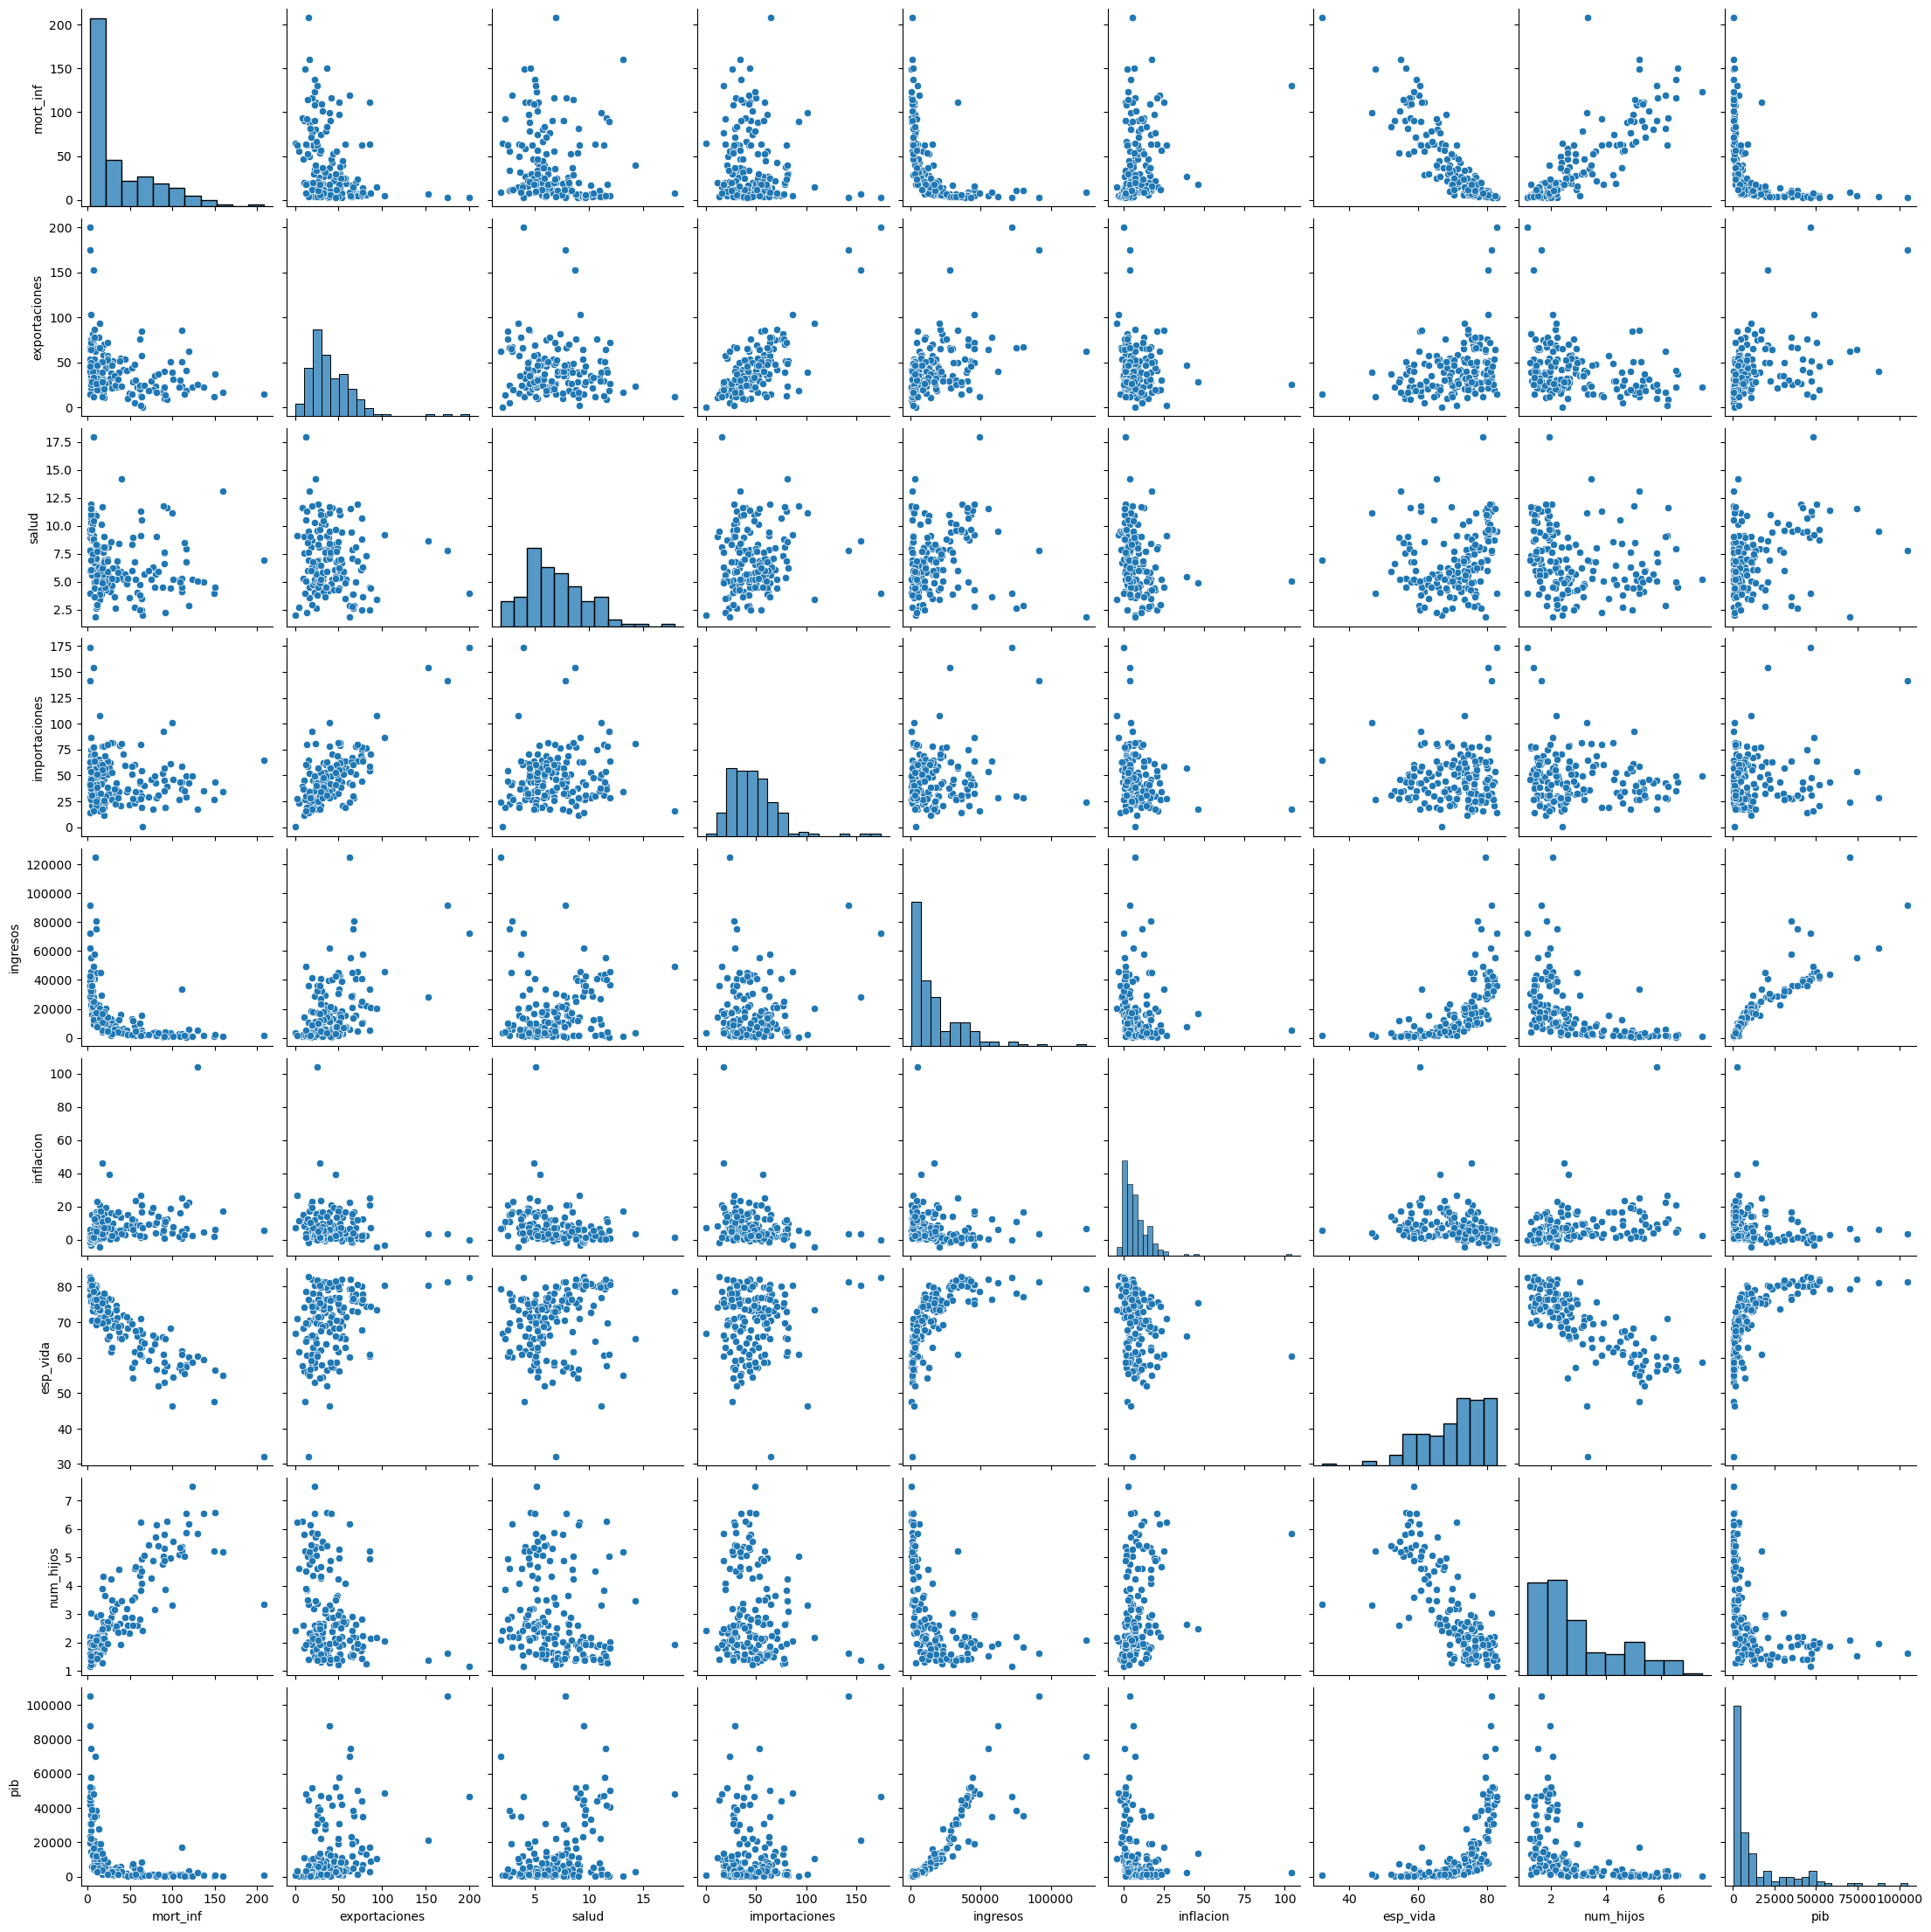

In [32]:
# Realiza un análisis exploratorio de los datos. ¿Puedes extraer alguna información?
# Realiza un preprocesado de los datos antes de pasar el siguiente apartado
sns.pairplot(data)

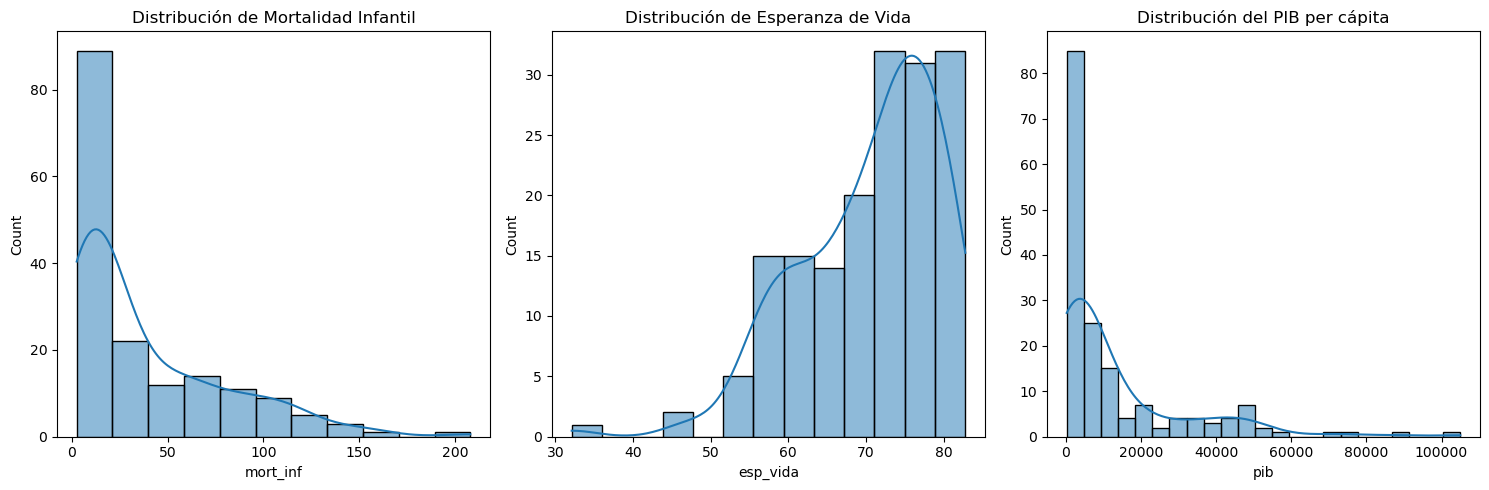

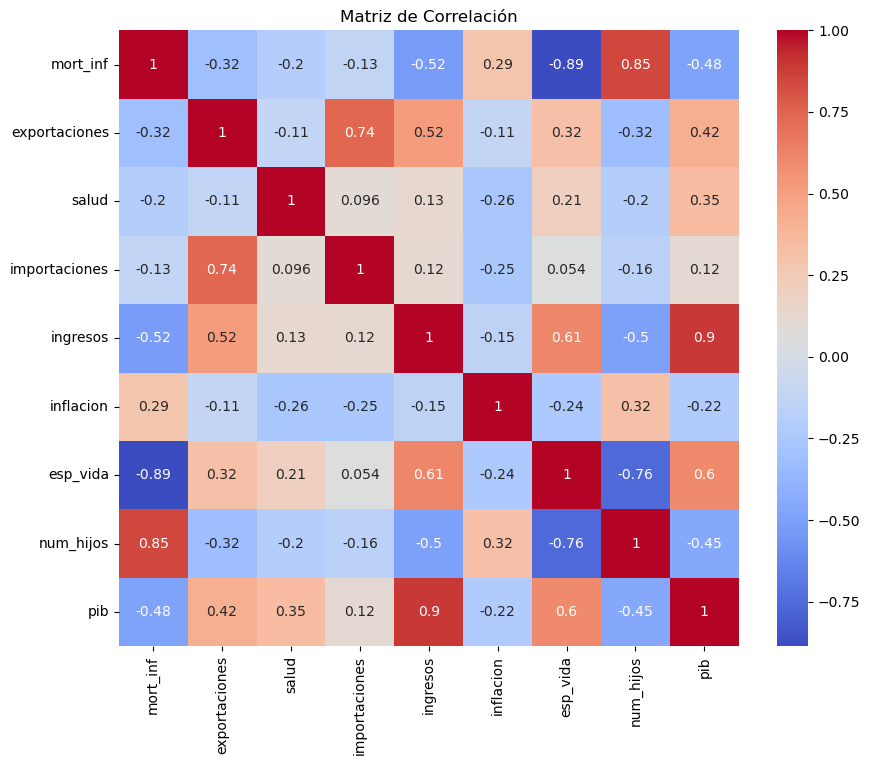

In [33]:

# Visualización de la distribución de algunas variables clave
plt.figure(figsize=(15, 5))

# Mortalidad Infantil
plt.subplot(1, 3, 1)
sns.histplot(data['mort_inf'], kde=True)
plt.title('Distribución de Mortalidad Infantil')

# Esperanza de Vida
plt.subplot(1, 3, 2)
sns.histplot(data['esp_vida'], kde=True)
plt.title('Distribución de Esperanza de Vida')

# PIB per cápita
plt.subplot(1, 3, 3)
sns.histplot(data['pib'], kde=True)
plt.title('Distribución del PIB per cápita')

plt.tight_layout()
plt.show()

# Calcular la matriz de correlación solo para las columnas numéricas
numeric_data = data.drop('pais', axis=1)  # Eliminar la columna 'pais' para el cálculo de correlación
corr_matrix = numeric_data.corr()

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Preprocesamiento de Datos ###

# Guardar los nombres de los países
country_names = data['pais']

# Eliminar la columna 'pais' para el escalamiento
data = data.drop('pais', axis=1)

# Inicializar el StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
scaled_data = scaler.fit_transform(data)

# Convertir el array escalado de nuevo en un DataFrame de pandas
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)

# Reincorporar los nombres de los países al DataFrame escalado
df_scaled.insert(0, 'pais', country_names)



## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica (4 puntos)

In [ ]:
# Crea al menos un modelo no supervisado, entrénalo y visualiza los resultados. ¿Cuál es el número óptimo de clústers? ¿Por qué? Qué conclusiones extraemos?

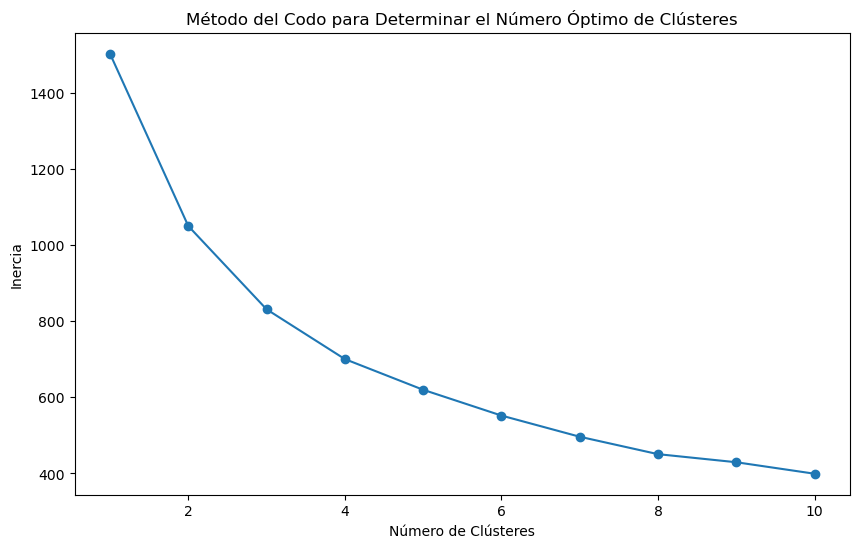

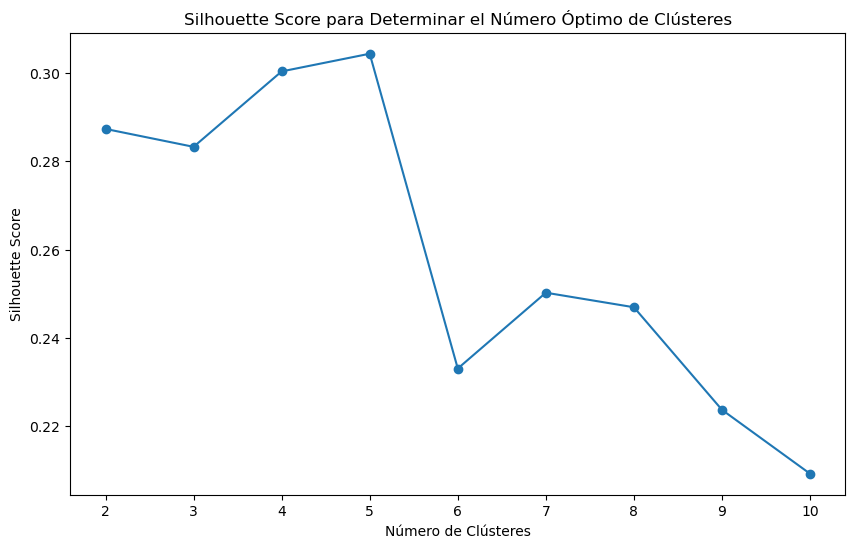

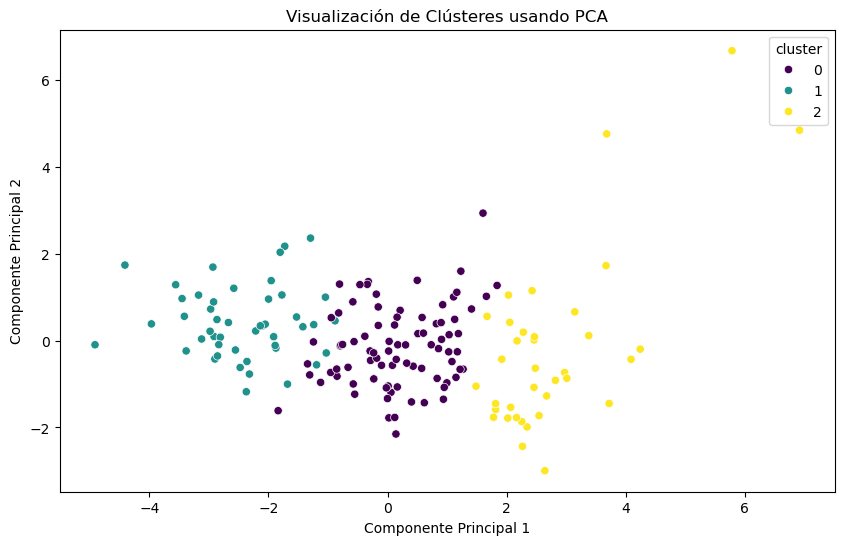

TypeError: agg function failed [how->mean,dtype->object]

In [37]:
### Modelado No Supervisado: K-Means ###

df_clustering = df_scaled.drop('pais', axis=1)

# Determinar el número óptimo de clústeres utilizando el método del codo
inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

# Determinar el número óptimo de clústeres utilizando el Silhouette Score
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df_clustering)
    silhouette_avg = silhouette_score(df_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.show()

# Entrenar el modelo K-Means con el número óptimo de clústeres (ejemplo: n_clusters=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_clustering)

# Agregar los clústeres al DataFrame escalado
df_scaled['cluster'] = clusters

# Visualizar los resultados (ejemplo: usando las dos primeras componentes principales)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_clustering)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Visualización de Clústeres usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Análisis de los clústeres
cluster_analysis = df_scaled.groupby('cluster').mean()
print("\nAnálisis de los clústeres:\n", cluster_analysis)

## 4. PCA (2 puntos)

In [ ]:
# ¿Tiene sentido la reducción de dimensionalidad de este dataset? Demúestralo y justifica tus respuestas.


## 5. Conclusiones (2 puntos)

In [ ]:
# ¿Qué información le podemos hacer llegar a Amancio?